Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("ex2data1.txt",header=None)

In [5]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

Plotting of Data

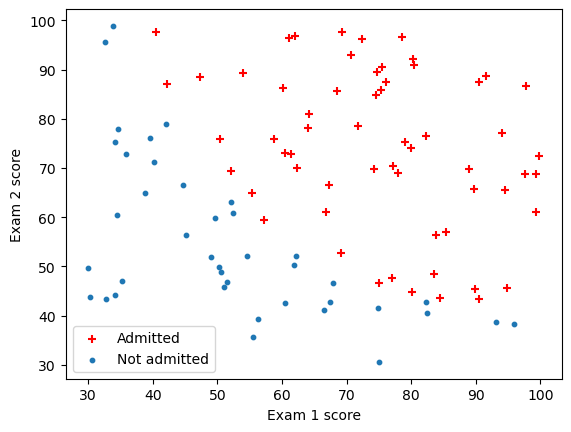

In [8]:
pos,neg=(y==1).reshape(100,1), (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted", "Not admitted"], loc=0)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
sigmoid(0)

0.5

Compute the Cost Function and Gradient

In [11]:
def costFunction(theta,X,y):
    m=len(y)
    predictions=sigmoid(np.dot(X,theta))
    error=(-y*np.log(predictions))-((1-y)*np.log(1-predictions))
    cost=1/m*sum(error)
    grad=1/m*np.dot(X.transpose(),(predictions-y))
    return cost[0],grad

Feature scalingS

Scaling

In [14]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    return X_norm, mean,std

In [15]:
m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=featureNormalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
cost,grad=costFunction(initial_theta,X,y)
print("Cost of initial theta is", cost)
print("Gradient at initial theta(zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta(zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Gradient Descent

In [16]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        cost,grad=costFunction(theta,X,y)
        theta=theta-(alpha*grad)
        J_history.append(cost)
    return theta, J_history


In [17]:
theta,J_history=gradientDescent(X,y,initial_theta,1,400)

In [18]:
print("Theta optimised by gradient descent:",theta)
print("The cost of the optimised theta:",J_history[-1])

Theta optimised by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimised theta: 0.2036004424822666


Plotting csot Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

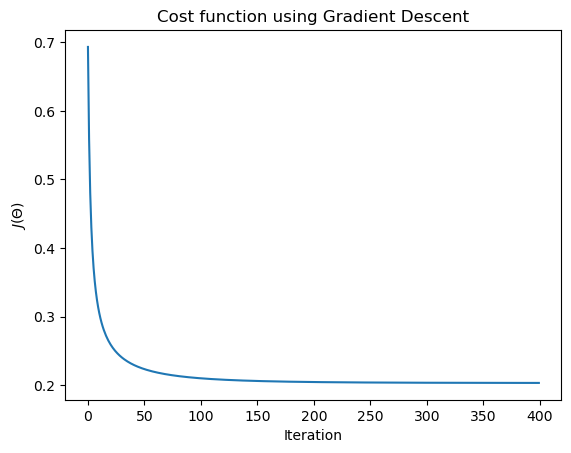

In [20]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Plotting the decision boundary

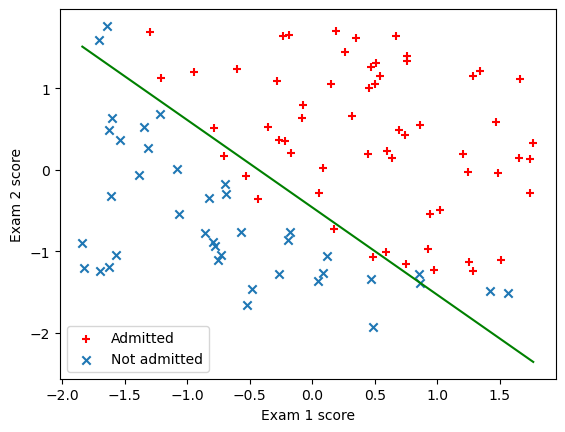

In [22]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+", label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

Prediction

In [24]:
def classifierPredict(theta,X):
    predictions=X.dot(theta)
    return predictions>0

In [25]:
x_test=np.array([45,85])
x_test=(x_test-X_mean)/X_std
x_test=np.append(np.ones(1),x_test)
prob=sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probablity of ",prob[0])

For a student with scores 45 and 85, we predict an admission probablity of  0.7677628875792492


Accuracy on training set

In [26]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
